# Assignment 2

## Problem 1 [20 Points]:

Suppose data $\{x_i\}_{i = 1}^{i = n}$ is drawn from a exponential distribution with parameter $\lambda$
- Derive the MLE estimate $\lambda_{\text{MLE}}$
- Derive the posterior distribution assuming the prior $\lambda \sim \mathrm{Gam(\tau, \omega)}$
- Derive the MAP estimate $\lambda_{\text{MAP}}$
- Explain how this MAP estimate differs from the MLE estimate, and provide an interpretation of $\tau$ and $\omega$ as to how they affect the estimate.

---

## Answer:

- By definition we have that

\begin{align}
    \lambda_{MLE} = \mathrm{argmax}_{\lambda} p(\mathcal{D} | \lambda)
\end{align}

Since $\log$ is a monotonically increasing function, we have that this is equivalent to
\begin{align}
    \lambda_{MLE} = \mathrm{argmax}_{\lambda} \log(p(\mathcal{D} | \lambda)) = \mathrm{argmin}_{\lambda} -\log(p(\mathcal{D} | \lambda))
\end{align}

We have that $\mathcal{L} = p(\mathcal{D} | \lambda) = p(x_1, x_2, \cdots, x_n | \lambda) = \prod_{i = 1}^n p(x_i, \lambda)$. 

At the minimum, we have that

\begin{align}
    \frac{\partial \log \mathcal{L}}{\partial \lambda}\bigg|_{\lambda_{\text{MLE}}} &= 0 \\
\implies \dfrac{\partial \mathcal{L}}{\partial \lambda} \bigg|_{\lambda_{MLE}} &= - \dfrac{n}{\lambda_{MLE}} + \sum_{i=1}^{n} x_i = 0 \\
\lambda_{MLE} & = \dfrac{n}{\sum_{i=1}^{n} x_i}
\end{align}

Additionally, we can see that the second derivative shows that we indeed have the minimizer
\begin{align}
    \dfrac{\partial^2 \mathcal{L}}{\partial \lambda^2} & = \dfrac{n}{\lambda^2} > 0
\end{align}

- We have that
\begin{align}
    p(\lambda | \mathcal{D}) &\propto p(\mathcal{D} | \lambda) p(\lambda) \\
    &\propto \left(\prod_{i = 1}^n \lambda e^{-\lambda x_i} \right) \cdot \dfrac{\omega^{\tau}\lambda^{\tau-1} e^{-\omega \lambda}}{\Gamma(\tau)} \\
    &\propto \lambda^{\tau + n - 1} e^{-(\omega + \sum_{i = 1}^n x_i) \lambda}
\end{align}

Hence, we can infer that $p(\lambda | \mathcal{D}) \sim \mathrm{Gam}(\tau + n, \omega + \sum_{i = 1}^n x_i)$

- Using that $\lambda_{\text{MAP}} = \mathrm{argmax}_\lambda p(\lambda | \mathcal{D})$, we get
\begin{align}
    \lambda_{\mathrm{MAP}} = \frac{n + \tau - 1}{\omega + \sum_{i = 1}^n x_i}
\end{align}

- In the case of the MAP estimate, we pretend like we've considered an additional $\tau - 1$ extra events over $\omega$ units of time. This acts as a regularizer especially when the sample size is small. As the number of samples approach infinity, the MLE and MAP estimates approach each other.

## Problem 2 [30 Points]:

Consider a Bayesian linear regression model where the outputs $y$ are distributed according to a Gaussian likelihood $p(y\lvert x, \alpha, \beta, \gamma)$ corresponding to a linear model $y = \alpha x + \beta + \epsilon$. Here $\gamma$ represents the noise level in the observed data, i.e. it corresponds to the precision of the data likelihood. In this case, the likelihood can be further expressed as:

$p(y\lvert x, \alpha, \beta, \gamma) = (\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})$

In a Bayesian setting we would like to assume prior distributions on the unknown parameters $\alpha$, $\beta$ and $\gamma$. Here we assume $p(\alpha) = \mathcal{N}(0, 1)$, $p(\beta) = \mathcal{N}(0, 1)$ and $p(\gamma) = \textrm{Gam(2, 1)}$ is a Gamma distribution.

Please write down the posterior conditional distribution for each of those parameters, i.e.,

$p(\alpha\lvert x, y, \beta, \gamma)$

$p(\beta\lvert x, y, \alpha, \gamma)$

$p(\gamma\lvert x, y, \alpha, \beta)$

Comment on your results.
(**HINT**: Might be easier to work with the $\log$ of the posterior, and "complete the square" to identify the distribution)

---

## Answer:


We have that
\begin{align}
    p(\alpha\lvert x, y, \beta, \gamma) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\alpha) \\
\implies \log(p(\alpha\lvert x, y, \beta, \gamma)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\alpha)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\alpha)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left(\frac{1}{\sqrt{2 \pi}} \exp(-\frac{\alpha^2}{2})\right) \\
                                        &\propto (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\frac{\alpha^2}{2} \\
                                        &\propto (-\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2})\alpha^2 + \gamma (\sum_{i=1}^n (x_i y_i - x_i \beta)) \alpha \\
                                        &\propto -\left((\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2})\alpha^2 - \gamma (\sum_{i=1}^n (x_i y_i - x_i \beta)) \alpha \right) \\
                                        &\propto -\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2} (\alpha - \frac{\gamma \sum_{i=1}^n (x_i y_i - x_i \beta)}{1 + \gamma \sum_{i=1}^n x_i^2})^2 \\
                                        &\propto \log(\mathcal{N}(\frac{\gamma (\sum_{i=1}^n (x_i y_i - x_i \beta))}{1 + \gamma \sum_{i=1}^n x_i^2}, \frac{1}{1 + \gamma \sum_{i=1}^n x_i^2})) \\
\implies p(\alpha\lvert x, y, \beta, \gamma) &= \mathcal{N}\left(\frac{\gamma (\sum_{i=1}^n (x_i y_i - x_i \beta))}{1 + \gamma \sum_{i=1}^n x_i^2}, \frac{1}{1 + \gamma \sum_{i=1}^n x_i^2}\right)
\end{align}

Similarly, we have

\begin{align}
    p(\beta\lvert x, y, \alpha, \gamma) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\beta) \\
\implies \log(p(\beta\lvert x, y, \alpha, \gamma)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\beta)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\beta)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left(\frac{1}{\sqrt{2 \pi}} \exp(-\frac{\beta^2}{2})\right) \\
                                        &\propto (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\frac{\beta^2}{2} \\
                                        &\propto (-\frac{1 + n \gamma}{2})\beta^2 + \gamma (\sum_{i=1}^n (y_i - x_i \alpha)) \beta \\
                                        &\propto -\left((\frac{1 + n \gamma}{2})\beta^2 - \gamma (\sum_{i=1}^n (y_i - x_i \alpha)) \beta \right) \\
                                        &\propto -\frac{1 + n \gamma}{2} (\beta - \frac{\gamma \sum_{i=1}^n (y_i - x_i \alpha)}{1 + n \gamma})^2 \\
                                        &\propto \log(\mathcal{N}(\frac{\gamma (\sum_{i=1}^n (y_i - x_i \alpha))}{1 + \gamma}, \frac{1}{1 + \gamma})) \\
\implies p(\beta\lvert x, y, \alpha, \gamma) &= \mathcal{N}\left(\frac{\gamma (\sum_{i=1}^n (y_i - x_i \alpha))}{1 + n\gamma}, \frac{1}{1 + n\gamma}\right)
\end{align}

Finally, we have

\begin{align}
    p(\gamma\lvert x, y, \alpha, \beta) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\gamma) \\
\implies \log(p(\gamma\lvert x, y, \alpha, \beta)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\gamma)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\gamma)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left( \gamma \exp(-\gamma)\right) \\
                                        &\propto (\frac{n}{2} + 1) \log(\gamma) + (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\gamma -\frac{n}{2} \log(2 \pi) \\
                                        &\propto (\frac{n}{2} + 1) \log(\gamma) - \left(\frac{(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2} + 1\right)\gamma
\end{align}


We have that $\log(\mathrm{Gam}(\alpha, \beta)(\gamma)) = \alpha \log(\beta) + (\alpha - 1) \log(\gamma) - \gamma \beta - \log(\Gamma (\alpha))$. By comparing with the above expression, we may infer that

\begin{align}
    p(\gamma\lvert x, y, \alpha, \beta) = \mathrm{Gam}\left(\frac{n}{2} + 2, 1 + \frac{1}{2} \sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2\right)
\end{align}

In [ ]:
# Importing libraries and functions used:
import jax
import jax.numpy as jnp
import numpy as np
# For figures and plotting:
import pylab as pl
# Used for the confusion matrix
from sklearn import metrics
import seaborn as sns
# Used for Loading MNIST
from struct import unpack

In [ ]:
# Downloading the data:
# The website seems to have datasets for both training and testing.
# However, since we just need 1000 images anyway and  plan to create
# the training / testing split ourselves, I've just used the data
# marked as "training" from the website.
!mkdir data
!wget -O data/train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -O data/train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# Now unzipping the data:
!gzip -d data/*.gz

--2022-02-21 01:34:58--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘data/train-images-idx3-ubyte.gz’

data/train-images-i 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2022-02-21 01:34:58 (79.0 MB/s) - ‘data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-02-21 01:34:59--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘data/train-labels-idx1-ubyte.gz’

data/train-labels-i

In [ ]:
def loadmnist(imagefile, labelfile):
    """
    Function used to load the images data and the labels
    from the files that were downloaded.
    """
    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [ ]:
# Loading the complete dataset:
imgs, lbls = loadmnist('data/train-images-idx3-ubyte', 'data/train-labels-idx1-ubyte')
# We are told to retain 1000 images and labels for 0, 1, 2
# Finding indices from labels which satisfy this:
idx0 = np.where(lbls == 0)[0]
idx1 = np.where(lbls == 1)[0]
idx2 = np.where(lbls == 2)[0]

# Additionally, we are told to take 1000 images
idx0 = np.random.permutation(idx0)[:1000]
idx1 = np.random.permutation(idx1)[:1000]
idx2 = np.random.permutation(idx2)[:1000]
# And perform a 80 / 20 split for training and test
idx_train = np.concatenate((idx0[:800], idx1[:800], idx2[:800]))
idx_test  = np.concatenate((idx0[800:], idx1[800:], idx2[800:]))
# Performing a random permutation:
idx_train = np.random.permutation(idx_train)
idx_test  = np.random.permutation(idx_test)
# Getting the corresponding images and labels
imgs_train, lbls_train = imgs[idx_train], lbls[idx_train]
imgs_test,  lbls_test  = imgs[idx_test],  lbls[idx_test]

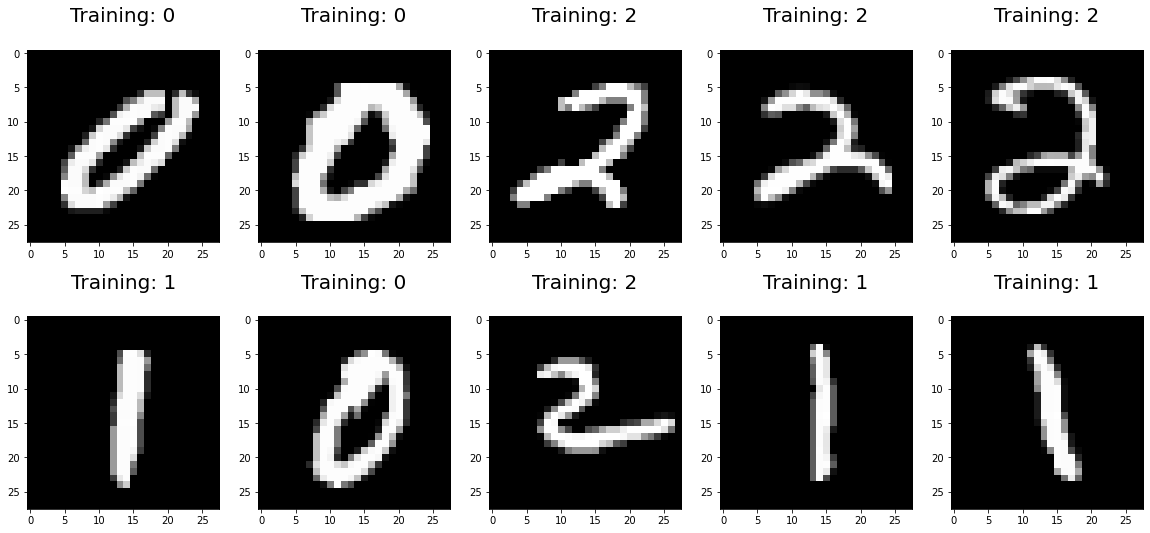

In [ ]:
# Visualizing if the mapping is performed correctly:
pl.figure(figsize=(20,9))
for index, (image, label) in enumerate(zip(imgs_train[0:10], lbls_train[0:10])):
    pl.subplot(2, 5, index + 1)
    pl.imshow(np.reshape(image, (28,28)), cmap=pl.cm.gray)
    pl.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
# Getting the data corresponding to 0 and 1:
idx              = (lbls_train == 0) | (lbls_train == 1)
X_train, y_train = imgs_train[idx], lbls_train[idx].reshape(-1, 1)
idx              = (lbls_test == 0) | (lbls_test == 1)
X_test, y_test   = imgs_test[idx], lbls_test[idx].reshape(-1, 1)

In [ ]:
def forward(params, X):
    return jax.nn.sigmoid(X @ params)

@jax.jit
def loss_fn(params, X, y):
    # Number of training examples
    m     = len(y)
    # Small parameter to prevent log from throwing nans
    eps   = 1e-7
    y_hat = forward(params, X)
    loss  = -(   y.T @ jnp.log(y_hat + eps) 
               + (1 - y).T @ jnp.log(1 - y_hat + eps)) / m
    
    return jnp.squeeze(loss)

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [ ]:
# Initializing weights as zeros:
params = jnp.zeros([784, 1])

# Gradient descent
# Learning Rate
alpha = 1e-4
n_its = 10000

loss_history = [loss_fn(params, X_train, y_train)]
for i in range(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = jax.tree_multimap(lambda x, g: x - alpha * g, params, g)

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

Text(0.5, 0, 'Number of Iterations')

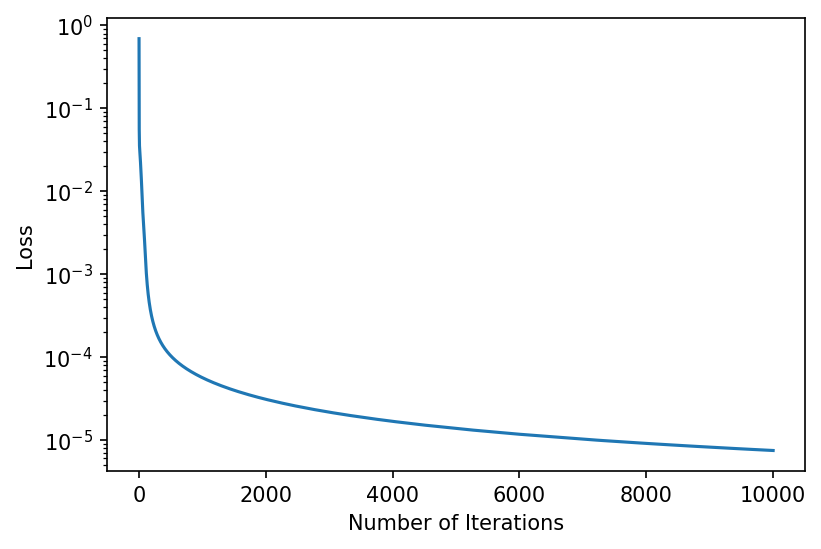

In [ ]:
pl.figure(dpi = 150)
pl.semilogy(loss_history)
pl.ylabel('Loss')
pl.xlabel('Number of Iterations')

In [ ]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
accuracy_score = (np.round(forward(params, X_test)) == y_test).mean()
cm             = metrics.confusion_matrix(y_test, jnp.round(forward(params, X_test)))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

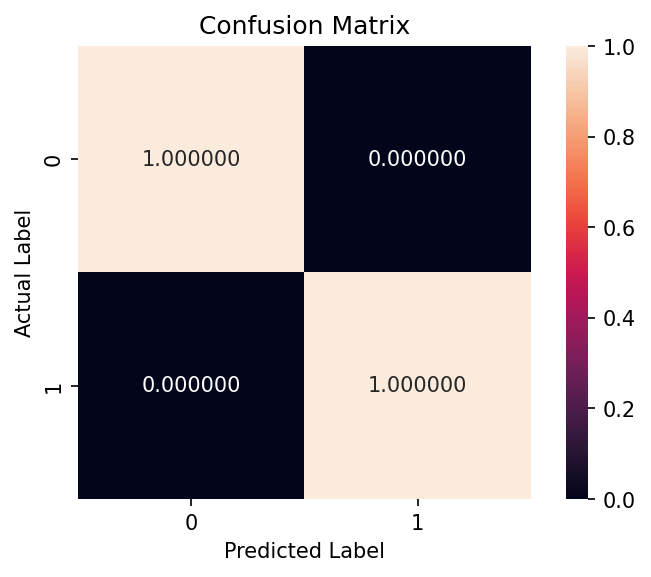

In [ ]:
pl.figure(dpi = 150)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
pl.ylabel('Actual Label');
pl.xlabel('Predicted Label');
pl.title('Confusion Matrix')

In [ ]:
# Now training on all 3 digits:
X_train, y_train = imgs_train, lbls_train
X_test,  y_test  = imgs_test,  lbls_test
# Doing one hot encoding for y:
onehot_encoded = list()
for value in y_train:
    classes        = [0 for _ in range(3)]
    classes[value] = 1
    onehot_encoded.append(classes)
# Replacing data with one hot encoded data:
y_train = np.array(onehot_encoded)

# Doing one hot encoding for y:
onehot_encoded = list()
for value in y_test:
    classes        = [0 for _ in range(3)]
    classes[value] = 1
    onehot_encoded.append(classes)
# Replacing data with one hot encoded data:
y_test = np.array(onehot_encoded)  

In [ ]:
def forward(params, X):
    return jax.nn.softmax(X @ params)

@jax.jit
def loss_fn(params, X, y):
    # Number of training examples
    m     = len(y)
    # Small parameter to prevent log from throwing nans
    eps   = 1e-7
    y_hat = forward(params, X)
    loss  = -jnp.sum(y * jnp.log(y_hat + eps)) / m
    
    return loss

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [ ]:
# Initializing weights as zeros:
params = jnp.zeros([784, 3])

# Gradient descent
# Learning Rate
alpha = 1e-6
n_its = 10000

loss_history = [loss_fn(params, X_train, y_train)]
for i in range(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = jax.tree_multimap(lambda x, g: x - alpha * g, params, g)

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

Text(0.5, 0, 'Number of Iterations')

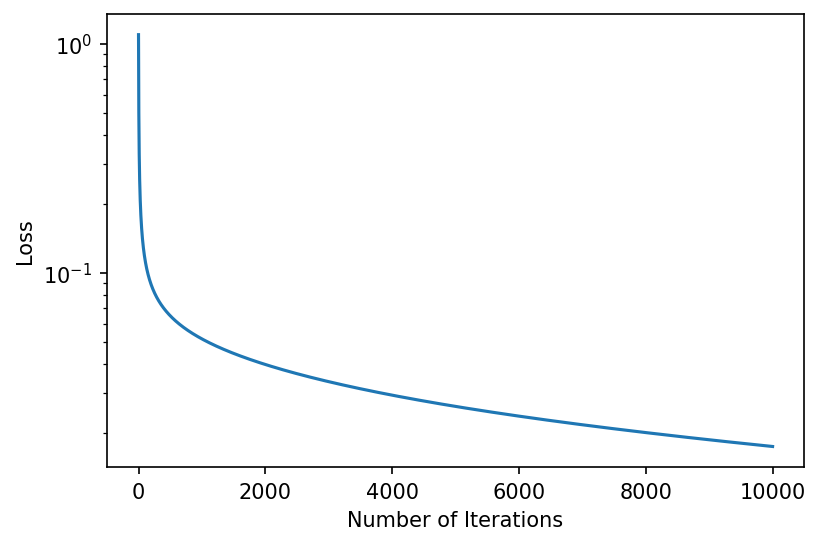

In [ ]:
pl.figure(dpi = 150)
pl.semilogy(loss_history)
pl.ylabel('Loss')
pl.xlabel('Number of Iterations')

In [ ]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
accuracy_score = (jnp.argmax(forward(params, X_test), axis = 1) == 
                  jnp.argmax(y_test, axis = 1)).mean()
cm             = metrics.confusion_matrix(jnp.argmax(y_test, axis = 1), 
                                          jnp.argmax(forward(params, X_test), axis = 1))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 0.99


Text(0.5, 1.0, 'Confusion Matrix')

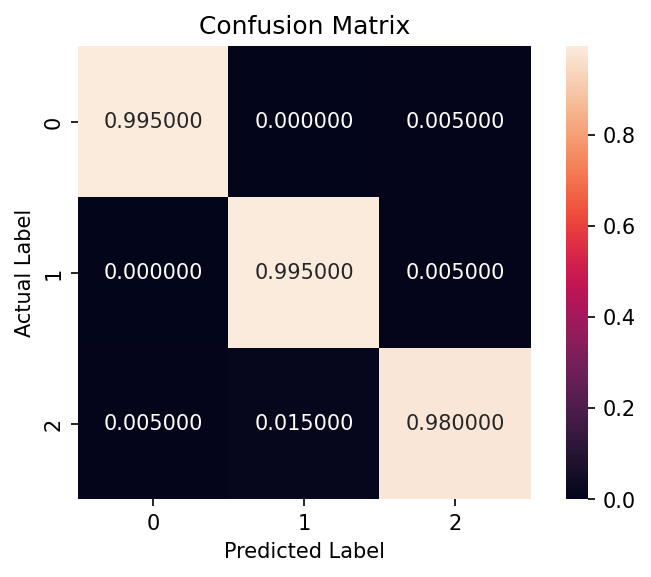

In [ ]:
pl.figure(dpi = 150)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
pl.ylabel('Actual Label');
pl.xlabel('Predicted Label');
pl.title('Confusion Matrix')

### Problem 4 [35 Points]

Bayesian linear regression can be naturally extended to support approximation of nonlinear functions via the use of features or basis functions such as polynomials or trigonometric features. The case covered in class is just a special case of polynomial basis where you only use bias term and the identity mapping $\phi(x) = x$, $\Phi(x) = [1, x]$. It is straightforward to use other bases to do Bayesian linear regression. Here we consider three sets of 2D data both randomly sampled using $N = 2500$ observations within interval $(x, y) \in[-1,1] \times [-1, 1]$.

$z_1(x, y) = \cos(10(x^2+y)) \sin(10(x+y^2)) + \epsilon,$

$z_2(x, y) = \frac{1}{(1 + 100 (x^2 - y^2)^2)} + \epsilon,$

$z_3(x, y) = \frac{1}{(1 + 100 (x^2 + y^2))} + \epsilon,$

where $\epsilon$ corresponds to a zero mean uncorrelated Gaussian noise with standard deviation set equal to 5 percent of your data's standard deviation.

(1) Generate these three data sets and visualize them.

In [ ]:
import numpy as onp

# Number of datapoints (in 1D):
N = 50
# Generating points in x and y:
X = 2 * onp.random.rand(N * N) - 1
Y = 2 * onp.random.rand(N * N) - 1

# Defining the functions to fit:
f1 = lambda x, y: onp.cos(10*(x**2+y)) * onp.sin(10*(x+y**2))
f2 = lambda x, y: 1 / (1 + 100 * (x**2 - y**2)**2)
f3 = lambda x, y: 1 / (1 + 100 * (x**2 + y**2))

Z1 = f1(X, Y)
Z2 = f2(X, Y)
Z3 = f3(X, Y)

# Adding noise:
Z1 = Z1 + 0.05 * Z1.std() * onp.random.randn(N * N)
Z2 = Z2 + 0.05 * Z2.std() * onp.random.randn(N * N)
Z3 = Z3 + 0.05 * Z3.std() * onp.random.randn(N * N)

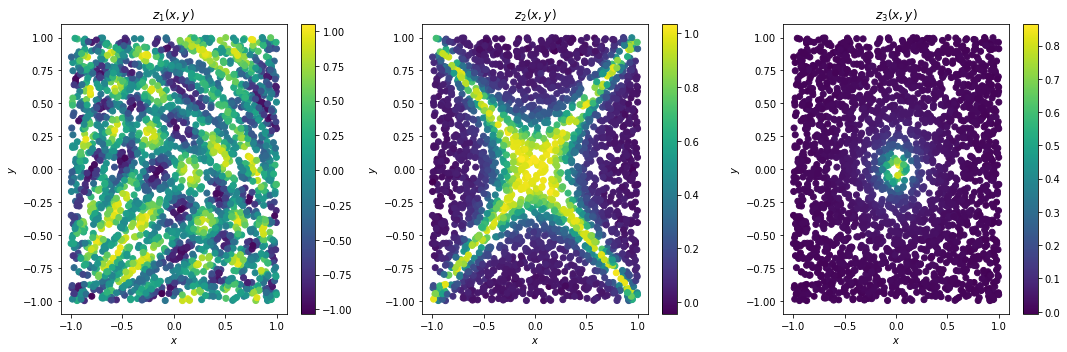

In [ ]:
pl.figure(figsize = (15, 5))

pl.subplot(1, 3, 1)
pl.scatter(X, Y, c = Z1, cmap = 'viridis')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.title(r'$z_1(x, y)$')
pl.colorbar()

pl.subplot(1, 3, 2)
pl.scatter(X, Y, c = Z2, cmap = 'viridis')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.title(r'$z_2(x, y)$')
pl.colorbar()

pl.subplot(1, 3, 3)
pl.scatter(X, Y, c = Z3, cmap = 'viridis')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.title(r'$z_3(x, y)$')
pl.colorbar()
pl.tight_layout()

(2) Consider Bayesian linear regression models using a tensor product of 1D basis functions:
$[\phi_1(x) \phi_1(y), \phi_1(x) \phi_2(y), \cdots \phi_1(x) \phi_m(y), \phi_2(x) \phi_1(y), \cdots \phi_m(x) \phi_m(y)]$

Consider the following 1D basis functions:
- Legendre basis. (https://en.wikipedia.org/wiki/Legendre\_polynomials)

- Fourier basis: $\Phi(x) = [1, \sin(\pi x), \cos(\pi x), \cdots, \sin(m \pi x), \cos(m \pi x)]$

- RBF basis: $\phi_1(x) = 1, \phi_i(x) = \exp(-100 (x - \xi_{i-1})^2) \forall i \neq 1, \xi = \texttt{linspace}(-1, 1, m)$

Assuming the corresponding likelihood and priors:
$p(z\lvert x, y, w) = \mathcal{N}(z \mid w^{T}\phi(x, y),\alpha^{-1}I), \ p(w)=\mathcal{N}(w\mid 0,\beta^{-1}I), \ \alpha=5, \beta = 0.1,$

derive the expression of the objective of your MLE and MAP estimations.

## Answer

We have that

\begin{align}
p(z\lvert x, y, w) = \mathcal{N}(z \mid w^{T}\phi(x, y),\alpha^{-1}I), \ p(w)=\mathcal{N}(w\mid 0,\beta^{-1}I), \ \alpha=5, \beta = 0.1
\end{align}

We will construct a basis functions matrix as an $(N \times m)$ matrix $\Phi$, where m denotes the chosen order for the basis.
\begin{align}
    \Phi =
    \begin{bmatrix}
    \phi_1(x_1) \phi_1(y_1) & \phi_1(x_1) \phi_2(y_1) & \phi_1(x_1) \phi_1(y_1)& \dots  & \phi_m(x_1) \phi_m(y_1)  \\
    \phi_1(x_2) \phi_1(y_2) & \phi_1(x_2) \phi_2(y_2)& \phi_1(x_2) \phi_3(y_2) & \dots  & \phi_m(x_2) \phi_m(y_2)  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \phi_1(x_N) \phi_1(y_N) & \phi_1(x_N) \phi_2(y_N)& \phi_1(x_N) \phi_3(y_N)  & \dots  & \phi_m(x_N) \phi_m(y_N) \\
    \end{bmatrix}
\end{align}

Now, we have that the MLE estimate satisfies

\begin{align}
w_{MLE} &= \mathrm{argmax}_{w} p(z\lvert x, y, w) = \mathrm{argmax}_{w} \mathcal{N}(z \mid w^{T}\phi(x, y),\alpha^{-1}I) \\
&\propto \mathrm{argmax}_{w} \exp(-(z - \Phi w)^T \alpha (z - \Phi w))
\end{align}

This can be determined by minimizing $(z - \Phi w)^T (z - \Phi w)$ by setting the derivative to zero
\begin{align}
    \frac{\partial}{\partial w} ((z - \Phi w)^T (z - \Phi w)) &= \frac{\partial}{\partial w} (z^T z - 2 w^T \Phi^T z + w^T \Phi^T \Phi w) \\
    &= -2 \Phi^T z + 2\Phi^T \Phi w = 0 \\
\implies w_{MLE} &= (\Phi^T \Phi)^{-1} \Phi^T z
\end{align}

The MAP estimate is given by

\begin{align}
    w_{MAP} = \mathrm{argmax}_{w} p(w | x, y, z) \propto p(z|x, y, w) p(w)
                                         &\propto \exp\left(-\alpha \frac{\alpha}{2} (z - \Phi w)^T (z - \Phi w) - \frac{\beta}{2} w^T w \right)  
\end{align}

Expanding the term inside the exponential, we can show that the posterior is a Gaussian as well by "completing the square".

\begin{align}
    \frac{\alpha}{2} (z - \Phi w)^T (z - \Phi w) + \frac{\beta}{2} w^T w = \alpha z^T z - 2 \alpha w^T \Phi^T z + w^T (\alpha \Phi^T \Phi + \beta I) w = (w - \mu)^T \Lambda (w - \mu) 
\end{align}

By determining $\mu$ and $\Lambda$ by matching terms, we can have the mean and precision of the underlying Gaussian distribution as

\begin{align}
    \Lambda &= \alpha \Phi^T \Phi + \beta I \\
    \mu     &= \alpha \Lambda^{-1} \Phi^T z
\end{align}

Using the least squares solution now, we have that
\begin{align}
    w_{MAP} = \left(\Phi^T \Phi + \frac{\beta}{\alpha} I \right)^{-1} \Phi^T z
\end{align}

(3) Implement JAX / Numpy code to do the regressions with these different basis for $m = 15$. Train your model and show the results for both data set including the training data, the MLE prediction, the MAP prediction and 5th and 95th percentiles from the 100 samples drawn from the predictive posterior distributions. Comments on your results.

In [ ]:
class BayesianLinearRegression(object):
    def __init__(self, X, Y, Z, basis = 'monomial', 
                 basis_order_1d = 2, alpha = 1.0, beta = 1.0):
        
        self.X = X.reshape(-1, 1)
        self.Y = Y.reshape(-1, 1)

        self.Z = Z.reshape(-1, 1)

        # Getting the feature matrix:
        self.basis          = basis
        self.basis_order_1d = basis_order_1d
        self.Phi            = self.return_feature_matrix(self.X, self.Y)

        # Store precisions
        self.alpha = alpha
        self.beta  = beta

        # Small jitter for numerically stable matrix inversion
        self.jitter = 1e-7

    def tensor_product(self, Phi_x, Phi_y):
        Phi = onp.zeros([Phi_x.shape[0], Phi_x.shape[1] * Phi_y.shape[1]])
        for i in range(Phi_x.shape[1]):
            for j in range(Phi_y.shape[1]):
                 Phi[:, i * Phi_y.shape[1] + j] = Phi_x[:, i] * Phi_y[:, j]

        return Phi

    def return_feature_matrix(self, x, y):
        basis       = self.basis
        basis_order = self.basis_order_1d

        # Creating the basis function matrix:
        if(basis == 'monomial'):
            Phi_x = (x.reshape(-1, 1))**(onp.arange(basis_order + 1).reshape(1, -1))
            Phi_y = (y.reshape(-1, 1))**(onp.arange(basis_order + 1).reshape(1, -1))
                        
            # Taking tensorproduct:
            Phi = self.tensor_product(Phi_x, Phi_y)
            return Phi

        elif(basis == 'fourier'):
            Phi_x = onp.ones([x.size, 1])
            Phi_y = onp.ones([y.size, 1])
            # Notion of basis_order in this maybe a little strange since we are
            # considering sin and cos so it's technically 2 * basis_order (??)
            for i in range(1, basis_order + 1):
                Phi_x = onp.hstack([Phi_x,
                                    onp.sin(i * onp.pi * x.reshape(-1, 1)),
                                    onp.cos(i * onp.pi * x.reshape(-1, 1))
                                   ])

                Phi_y = onp.hstack([Phi_y,
                                    onp.sin(i * onp.pi * y.reshape(-1, 1)),
                                    onp.cos(i * onp.pi * y.reshape(-1, 1))
                                   ])

            # Taking tensorproduct:
            Phi = self.tensor_product(Phi_x, Phi_y)
            return Phi

        elif(basis == 'legendre'):
            Phi_x = onp.hstack([onp.ones([x.size, 1]), x.reshape(-1, 1)])
            Phi_y = onp.hstack([onp.ones([y.size, 1]), y.reshape(-1, 1)])
            # Now using the recurrence relation
            # (n + 1) P_{n + 1}(x) = (2n + 1) x P_n(x) - n P_{n-1}(x)
            for i in range(2, basis_order + 1):
                P_i_minus_one = Phi_x[:, -1].reshape(-1, 1)
                P_i_minus_two = Phi_x[:, -2].reshape(-1, 1)
                P_i           = (1 / i) * (  (2 * i - 1) * x.reshape(-1, 1) * P_i_minus_one
                                           - (i - 1) * P_i_minus_two
                                          )
                # Updating the feature matrix:
                Phi_x = onp.hstack([Phi_x, P_i])

                P_i_minus_one = Phi_y[:, -1].reshape(-1, 1)
                P_i_minus_two = Phi_y[:, -2].reshape(-1, 1)
                P_i           = (1 / i) * (  (2 * i - 1) * y.reshape(-1, 1) * P_i_minus_one
                                           - (i - 1) * P_i_minus_two
                                          )
                # Updating the feature matrix:
                Phi_y = onp.hstack([Phi_y, P_i])

            # Taking tensorproduct:
            Phi = self.tensor_product(Phi_x, Phi_y)
            return Phi

        elif(basis == 'rbf'):
            Phi_x = onp.ones([x.size, 1])
            Phi_y = onp.ones([y.size, 1])
            pts = onp.linspace(-1, 1, basis_order)
            for i in range(basis_order):
                P_i = onp.exp(-100 * (x.reshape(-1, 1) - pts[i])**2)
                # Updating the feature matrix:
                Phi_x = onp.hstack([Phi_x, P_i])
                P_i = onp.exp(-100 * (y.reshape(-1, 1) - pts[i])**2)
                # Updating the feature matrix:
                Phi_y = onp.hstack([Phi_y, P_i])
            # Taking tensorproduct:
            Phi = self.tensor_product(Phi_x, Phi_y)
            return Phi
        
        else:
            raise NotImplemented

    # Computes the MLE estimate of the regression weights
    def fit_MLE(self):
        PhiTPhi_inv = onp.linalg.inv(  onp.matmul(self.Phi.T, self.Phi)
                                     + self.jitter * onp.eye(self.Phi.shape[1])
                                    )
        PhiTz       = onp.matmul(self.Phi.T, self.Z)
        w_MLE       = onp.matmul(PhiTPhi_inv, PhiTz)
        self.w_MLE  = w_MLE
        
        return w_MLE

    # Computes the MAP estimate of the regression weights
    def fit_MAP(self):
        Lambda     = onp.matmul(self.Phi.T, self.Phi) + \
                     (self.beta/self.alpha) * onp.eye(self.Phi.shape[1])
        Lambda_inv = onp.linalg.inv(Lambda)
        PhiTz      = onp.matmul(self.Phi.T, self.Z)
        mu         = onp.matmul(Lambda_inv, PhiTz)
        self.w_MAP = mu
        # Storing parameters for later use:
        self.Lambda_inv = Lambda_inv
        
        return mu, Lambda_inv

    # Computes the predictive posterior distribution
    def predictive_distribution(self, X_star, Y_star):
        Phi_star  = self.return_feature_matrix(X_star, Y_star)
        mean_star = onp.matmul(Phi_star, self.w_MAP)
        var_star  = onp.eye(Phi_star.shape[0])/self.alpha + \
                    onp.matmul(Phi_star, onp.matmul(self.Lambda_inv, Phi_star.T))

        return mean_star, var_star

In [ ]:
alpha = 0.5
beta  = 0.1
# Order of Basis:
basis_order = 15
# Defining the models:
model1 = BayesianLinearRegression(X, Y, Z1, 'fourier', basis_order, alpha, beta)
model2 = BayesianLinearRegression(X, Y, Z1, 'legendre', basis_order, alpha, beta)
model3 = BayesianLinearRegression(X, Y, Z1, 'rbf', basis_order, alpha, beta)

model4 = BayesianLinearRegression(X, Y, Z2, 'fourier', basis_order, alpha, beta)
model5 = BayesianLinearRegression(X, Y, Z2, 'legendre', basis_order, alpha, beta)
model6 = BayesianLinearRegression(X, Y, Z2, 'rbf', basis_order, alpha, beta)

model7 = BayesianLinearRegression(X, Y, Z3, 'fourier', basis_order, alpha, beta)
model8 = BayesianLinearRegression(X, Y, Z3, 'legendre', basis_order, alpha, beta)
model9 = BayesianLinearRegression(X, Y, Z3, 'rbf', basis_order, alpha, beta)

In [ ]:
# Finding the MLE and MAP estimates:
w1_MLE              = model1.fit_MLE()
w1_MAP, Lambda1_inv = model1.fit_MAP()
w2_MLE              = model2.fit_MLE()
w2_MAP, Lambda2_inv = model2.fit_MAP()
w3_MLE              = model3.fit_MLE()
w3_MAP, Lambda3_inv = model3.fit_MAP()
w4_MLE              = model4.fit_MLE()
w4_MAP, Lambda4_inv = model4.fit_MAP()
w5_MLE              = model5.fit_MLE()
w5_MAP, Lambda5_inv = model5.fit_MAP()
w6_MLE              = model6.fit_MLE()
w6_MAP, Lambda6_inv = model6.fit_MAP()
w7_MLE              = model7.fit_MLE()
w7_MAP, Lambda7_inv = model7.fit_MAP()
w8_MLE              = model8.fit_MLE()
w8_MAP, Lambda8_inv = model8.fit_MAP()
w9_MLE              = model9.fit_MLE()
w9_MAP, Lambda9_inv = model9.fit_MAP()

In [ ]:
# Resolution for test points:
N = 50

# Predict at a set of test points
x_star = onp.linspace(-1, 1, N); 
y_star = onp.linspace(-1, 1, N);
X_star, Y_star = onp.meshgrid(x_star, y_star)

Z1 = f1(X_star.ravel(), Y_star.ravel()).reshape(X_star.shape)
Z2 = f2(X_star.ravel(), Y_star.ravel()).reshape(X_star.shape)
Z3 = f3(X_star.ravel(), Y_star.ravel()).reshape(X_star.shape)

y1_pred_MLE = onp.matmul(model1.return_feature_matrix(X_star, Y_star), w1_MLE)
y1_pred_MAP = onp.matmul(model1.return_feature_matrix(X_star, Y_star), w1_MAP)
y2_pred_MLE = onp.matmul(model2.return_feature_matrix(X_star, Y_star), w2_MLE)
y2_pred_MAP = onp.matmul(model2.return_feature_matrix(X_star, Y_star), w2_MAP)
y3_pred_MLE = onp.matmul(model3.return_feature_matrix(X_star, Y_star), w3_MLE)
y3_pred_MAP = onp.matmul(model3.return_feature_matrix(X_star, Y_star), w3_MAP)
y4_pred_MLE = onp.matmul(model4.return_feature_matrix(X_star, Y_star), w4_MLE)
y4_pred_MAP = onp.matmul(model4.return_feature_matrix(X_star, Y_star), w4_MAP)
y5_pred_MLE = onp.matmul(model5.return_feature_matrix(X_star, Y_star), w5_MLE)
y5_pred_MAP = onp.matmul(model5.return_feature_matrix(X_star, Y_star), w5_MAP)
y6_pred_MLE = onp.matmul(model6.return_feature_matrix(X_star, Y_star), w6_MLE)
y6_pred_MAP = onp.matmul(model6.return_feature_matrix(X_star, Y_star), w6_MAP)
y7_pred_MLE = onp.matmul(model7.return_feature_matrix(X_star, Y_star), w7_MLE)
y7_pred_MAP = onp.matmul(model7.return_feature_matrix(X_star, Y_star), w7_MAP)
y8_pred_MLE = onp.matmul(model8.return_feature_matrix(X_star, Y_star), w8_MLE)
y8_pred_MAP = onp.matmul(model8.return_feature_matrix(X_star, Y_star), w8_MAP)
y9_pred_MLE = onp.matmul(model9.return_feature_matrix(X_star, Y_star), w9_MLE)
y9_pred_MAP = onp.matmul(model9.return_feature_matrix(X_star, Y_star), w9_MAP)

In [ ]:
mean1_star, var1_star = model1.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean2_star, var2_star = model2.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean3_star, var3_star = model3.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean4_star, var4_star = model4.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean5_star, var5_star = model5.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean6_star, var6_star = model6.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean7_star, var7_star = model7.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean8_star, var8_star = model8.predictive_distribution(X_star.ravel(), Y_star.ravel())
mean9_star, var9_star = model9.predictive_distribution(X_star.ravel(), Y_star.ravel())

# Draw samples from the predictive posterior
num_samples = 100
samples1 = onp.random.multivariate_normal(mean1_star.flatten(), 
                                          var1_star, (num_samples,)
                                         )
samples2 = onp.random.multivariate_normal(mean2_star.flatten(), 
                                          var2_star, (num_samples,)
                                         )
samples3 = onp.random.multivariate_normal(mean3_star.flatten(), 
                                          var3_star, (num_samples,)
                                         )
samples4 = onp.random.multivariate_normal(mean4_star.flatten(), 
                                          var4_star, (num_samples,)
                                         )
samples5 = onp.random.multivariate_normal(mean5_star.flatten(), 
                                          var5_star, (num_samples,)
                                         )
samples6 = onp.random.multivariate_normal(mean6_star.flatten(), 
                                          var6_star, (num_samples,)
                                         )
samples7 = onp.random.multivariate_normal(mean7_star.flatten(), 
                                          var7_star, (num_samples,)
                                         )
samples8 = onp.random.multivariate_normal(mean8_star.flatten(), 
                                          var8_star, (num_samples,)
                                         )
samples9 = onp.random.multivariate_normal(mean9_star.flatten(), 
                                          var9_star, (num_samples,)
                                         )

percentiles1 = onp.percentile(samples1, onp.array([5.0, 95.0]), axis=0)
percentiles2 = onp.percentile(samples2, onp.array([5.0, 95.0]), axis=0)
percentiles3 = onp.percentile(samples3, onp.array([5.0, 95.0]), axis=0)
percentiles4 = onp.percentile(samples4, onp.array([5.0, 95.0]), axis=0)
percentiles5 = onp.percentile(samples5, onp.array([5.0, 95.0]), axis=0)
percentiles6 = onp.percentile(samples6, onp.array([5.0, 95.0]), axis=0)
percentiles7 = onp.percentile(samples7, onp.array([5.0, 95.0]), axis=0)
percentiles8 = onp.percentile(samples8, onp.array([5.0, 95.0]), axis=0)
percentiles9 = onp.percentile(samples9, onp.array([5.0, 95.0]), axis=0)

Text(0.5, 0.92, 'MAP Estimate')

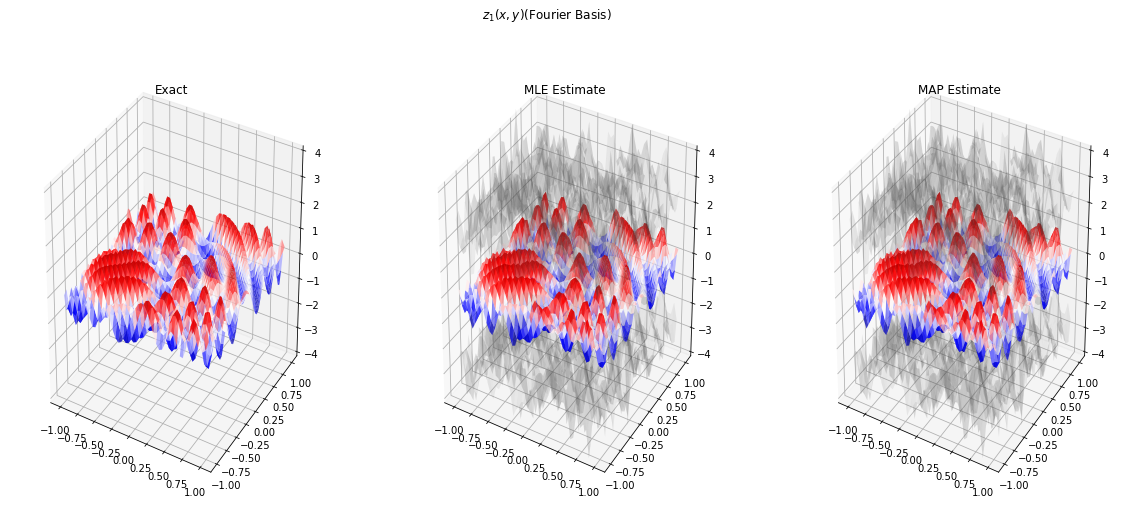

In [39]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_1(x, y)$(Fourier Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z1.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y1_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles1[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles1[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y1_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles1[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles1[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

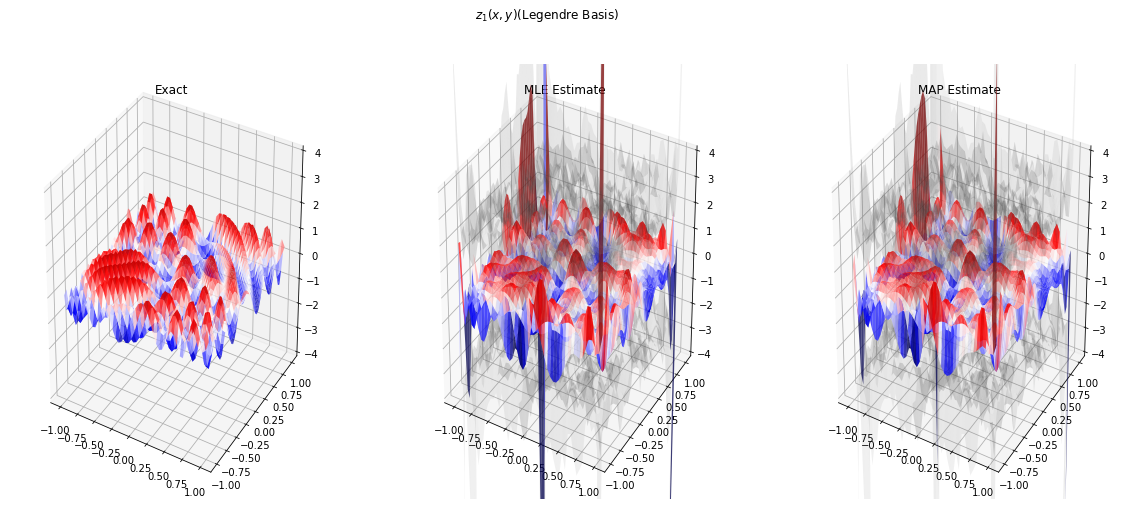

In [40]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_1(x, y)$(Legendre Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z1.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y2_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles2[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles2[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y2_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles2[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles2[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

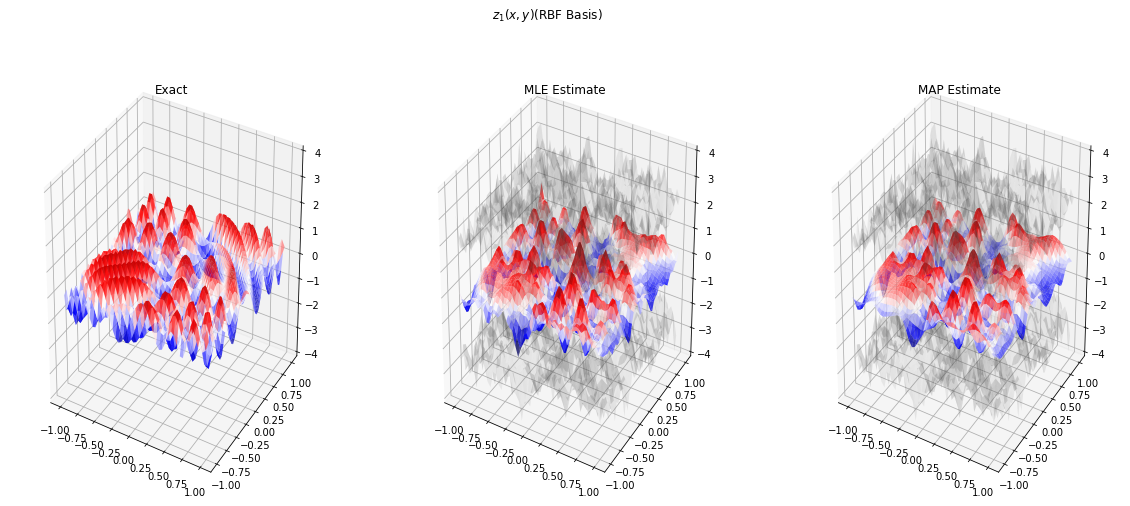

In [49]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_1(x, y)$(RBF Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z1.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y3_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles3[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles3[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y3_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-1.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles3[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles3[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

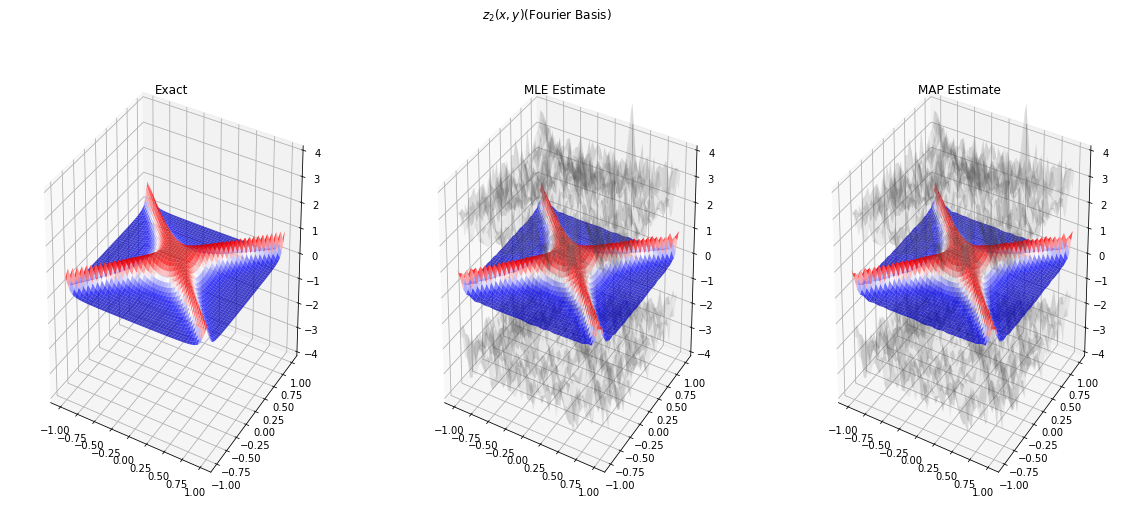

In [50]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_2(x, y)$(Fourier Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z2.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y4_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles4[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles4[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y4_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles4[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles4[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

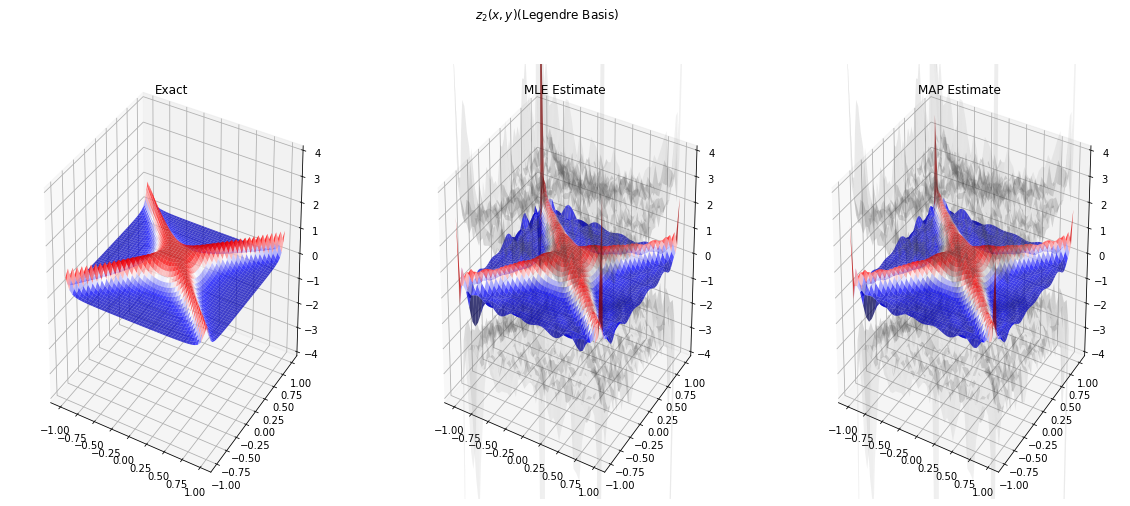

In [51]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_2(x, y)$(Legendre Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z2.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y5_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles5[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles5[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y5_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles5[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles5[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

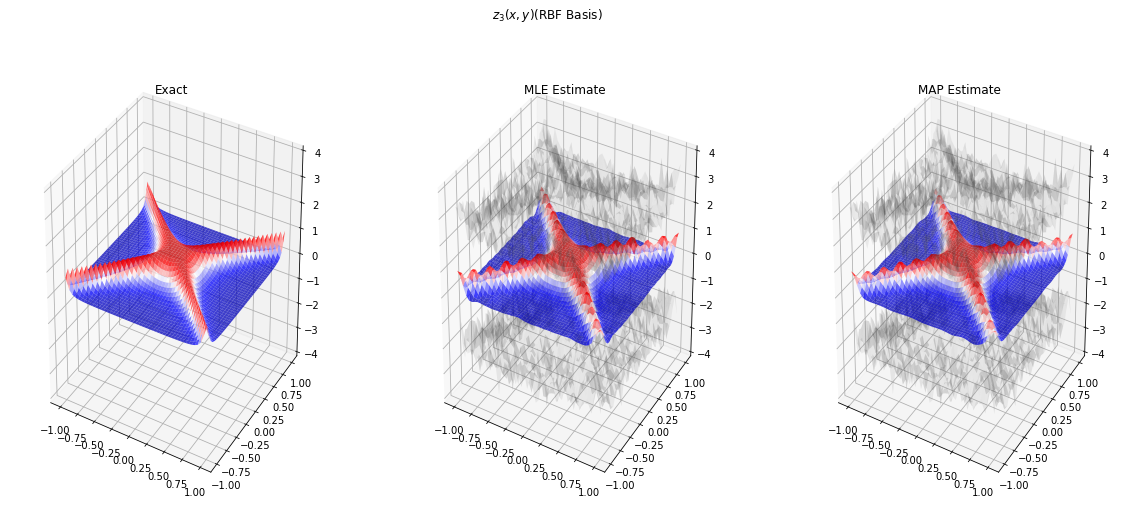

In [52]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_3(x, y)$(RBF Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z2.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y6_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles6[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles6[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y6_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles6[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles6[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

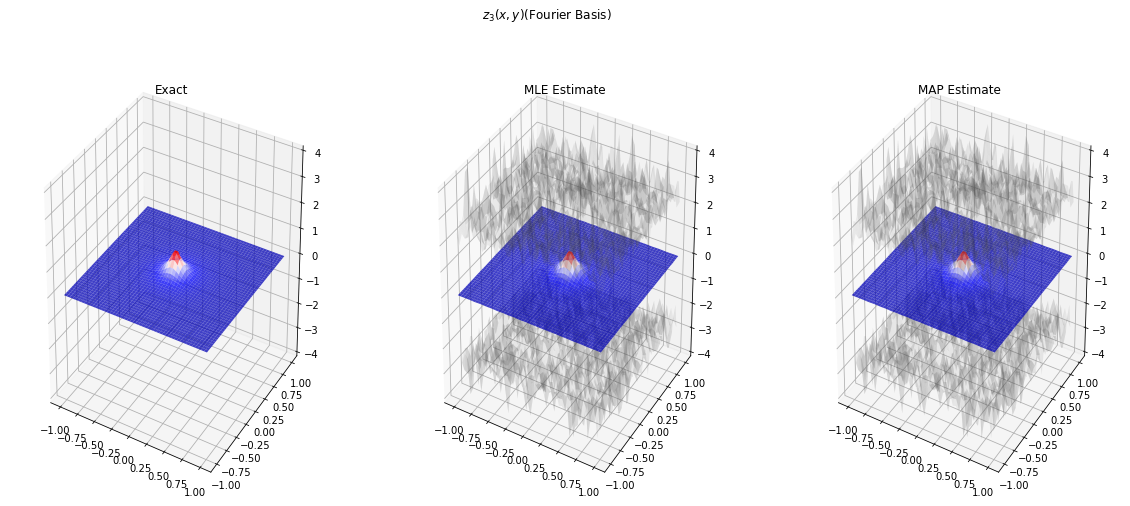

In [58]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_3(x, y)$(Fourier Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z3.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y7_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles7[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles7[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y7_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles7[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles7[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

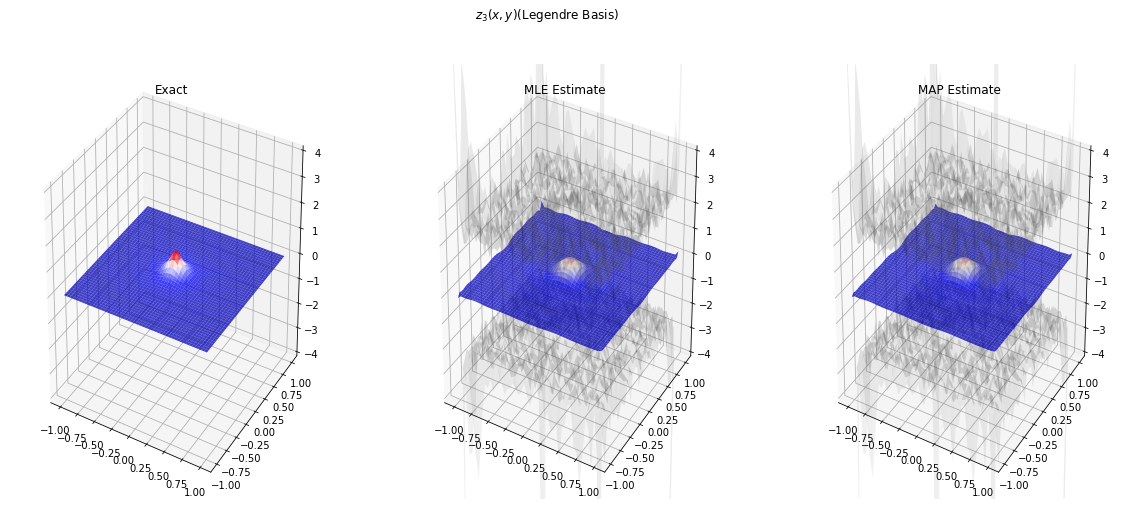

In [60]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_3(x, y)$(Legendre Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z3.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y8_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles8[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles8[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y8_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles8[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles8[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

Text(0.5, 0.92, 'MAP Estimate')

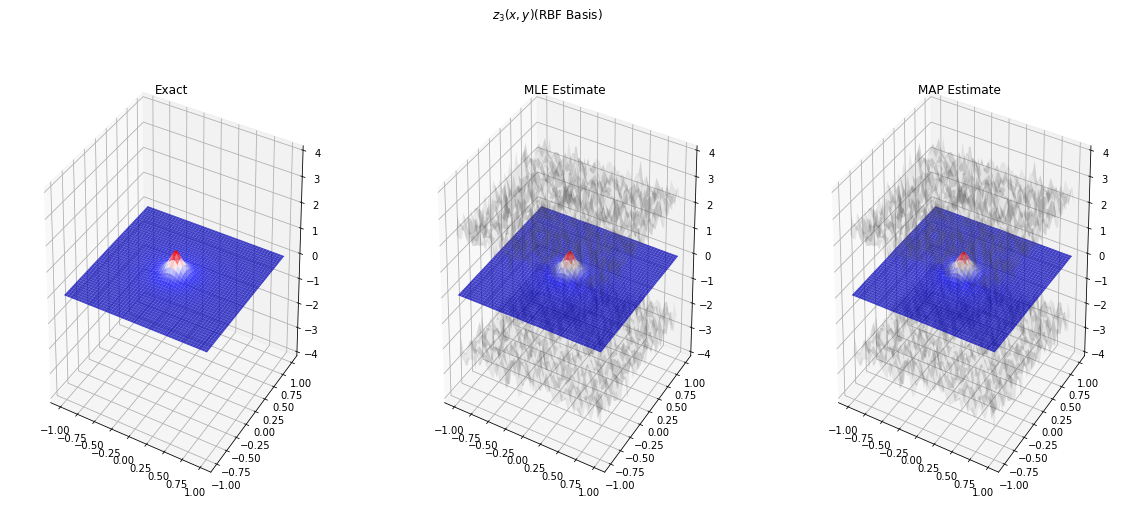

In [61]:
fig = pl.figure(figsize=(20, 8))
fig.suptitle(r'$z_3(x, y)$(RBF Basis)')

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X_star, Y_star, Z3.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.set_zlim([-4, 4])
ax.set_title(r'Exact')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X_star, Y_star, y9_pred_MLE.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles9[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles9[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MLE Estimate')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_star, Y_star, y9_pred_MAP.reshape(N, N),
                alpha = 0.75, cmap='seismic', linewidth=0, 
                antialiased=True, vmin=-0.2, vmax=1.2
               )
ax.plot_surface(X_star, Y_star, percentiles9[0, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.plot_surface(X_star, Y_star, percentiles9[1, :].reshape(N, N),
                alpha = 0.1, color='grey', linewidth=0, 
                antialiased=True
               )
ax.set_zlim([-4, 4])
ax.set_title(r'MAP Estimate')

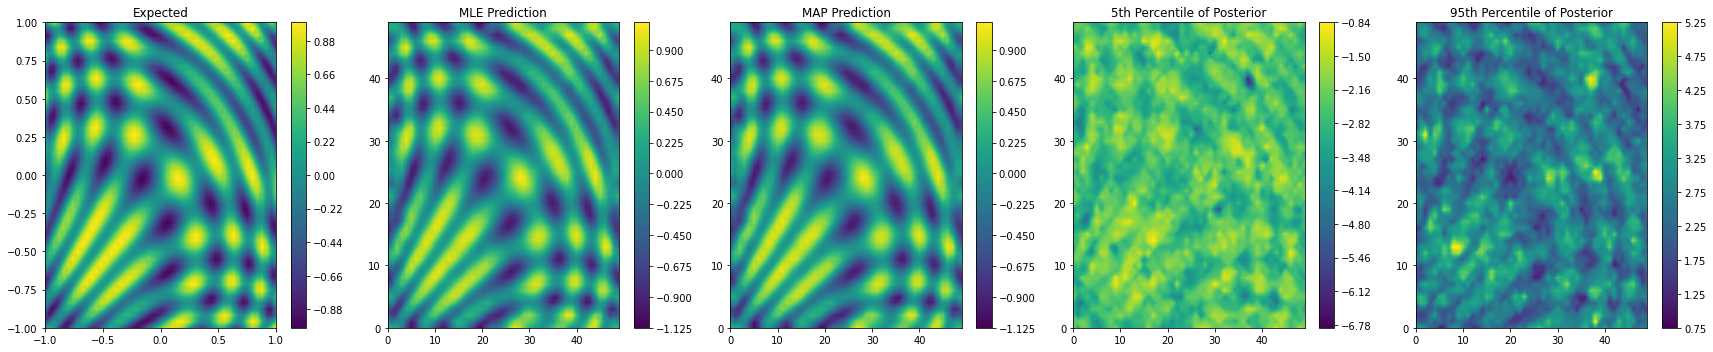

In [62]:
# Alternatively, you could have chosen to plot like this as well:
pl.figure(figsize = (24, 5))

pl.subplot(1, 5, 1)
pl.contourf(X_star, Y_star, Z1.reshape(N, N), 100)
pl.title('Expected')
pl.colorbar()

pl.subplot(1, 5, 2)
pl.contourf(y1_pred_MLE.reshape(N, N), 100)
pl.title('MLE Prediction')
pl.colorbar()

pl.subplot(1, 5, 3)
pl.contourf(y1_pred_MAP.reshape(N, N), 100)
pl.title('MAP Prediction')
pl.colorbar()

pl.subplot(1, 5, 4)
pl.contourf(percentiles1[0, :].reshape(N, N), 100)
pl.title('5th Percentile of Posterior')
pl.colorbar()

pl.subplot(1, 5, 5)
pl.contourf(percentiles1[1, :].reshape(N, N), 100)
pl.title('95th Percentile of Posterior')
pl.colorbar()

pl.tight_layout()


- We note that the Fourier basis performs the best of the lot - however it does have an unfair advantage having twice the number of 1d functions - hence almost 4x basis functions as the others

- The regularized MAP estimate is smoother and more consistent with the realized dataset than the MLE estimate especially as seen in the case of the RBF basis. This additional regularization also helps with lowering the condition number of the matrix we finally invert.

- One thing that can be noticed is that the Legendre basis shows rather low accuracy - we especially notice that this performance is worst at the corners. This may be attributed to the fact that Legendre polynomial only take on $\pm 1$ at the boundaries and cannot attain zero.

- In contrast to the Fourier and Legendre functions, the RBF basis is local in nature. As can be seen in our results, we notice that the approximants generated are compact bumps in space. In particular, we note that $z_3$ which just shows a bump in the center of the domain can be well-approximated by the RBF functions.  